In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
df = pd.read_csv('dataset 1/Pokemon.csv', index_col=0)

In [176]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [177]:
df.shape

(800, 12)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


### Technical Questions

##### In total, how many Pokemons are there in the dataset?

In [179]:
# check for pokemon name
pokemon_names = df['Name']

In [180]:
# check for duplicate
pokemon_names.duplicated().sum() # there exist no duplicated name

0

In [181]:
# count
pokemon_names.count() # There are 800 pokemons

800

##### What is the most common Speed?

In [182]:
# use mode
df['Speed'].mode() # most common speed is 50

0    50
Name: Speed, dtype: int64

In [183]:
# we can use value_counts too
df['Speed'].value_counts(ascending=False) # speed 50 occurs 46 times

Speed
50     46
60     44
70     37
65     36
30     35
       ..
39      1
24      1
82      1
113     1
123     1
Name: count, Length: 108, dtype: int64

##### Which Pokemon has the highest Attack? Be careful to spell the name of the Pokemon correctly, including use of spaces (if any).

In [184]:
df[df['Attack'] == df['Attack'].max()]['Name'] # MewtwoMega Mewtwo X has the Highest Attack

#
150    MewtwoMega Mewtwo X
Name: Name, dtype: object

##### How many legendary Pokemon are there?

In [185]:
df['Legendary'].value_counts() # 65 Legendary Pokemon

Legendary
False    735
True      65
Name: count, dtype: int64

##### Which Type 1 Flying Pokemon has the highest Sp. Atk? Be careful to spell the name of the Pokemon correctly, including use of spaces (if any).

In [186]:
# filter pokemon to flying pokemon only
type_1_flying_pokemon = df[df['Type 1'] == 'Flying']
type_1_flying_pokemon

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False


In [187]:
# filter for max Sp. Atk
type_1_flying_pokemon[type_1_flying_pokemon['Sp. Atk'] == type_1_flying_pokemon['Sp. Atk'].max()]['Name']

#
641    TornadusIncarnate Forme
Name: Name, dtype: object

##### There are duplicated Pokemon in the dataset. True or false? 

Note that for scenarios where there are two versions of the same Pokemon e.g. “VenusaurMega Venusaur” and “Venusaur”, it does NOT count as duplicated Pokemon.

In [188]:
# check for duplicates
df.duplicated().sum() # no duplicates

0

##### Which generation has the most number of Pokemon?

In [189]:
# counts based on Generation
df['Generation'].value_counts() # Generation 1 has the mosr pokemon

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

##### How many columns are there in the dataset?

In [190]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [207]:
len(df.columns) + 1 # 13 columns, 1 is the col for the index

13

In [209]:
df.shape[1] + 1 # shape gives us the (rows,columns)

13

##### In Generation 2, how many Type 2 Fairy Pokemon are there?

In [210]:
# filter based on Generation 2
gen_2 = df[df['Generation'] == 2]
gen_2.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False


In [211]:
# count the number of Type 2 Fairy
gen_2_fairy = gen_2[gen_2['Type 2'] == 'Fairy']

In [212]:
 gen_2_fairy.shape[0] # 3 type 2 fairy

3

##### Which Pokemon has the lowest HP? Be careful to spell the name of the Pokemon correctly, including use of spaces (if any).

In [213]:
df[df['HP'] == df['HP'].min()]['Name']

#
292    Shedinja
Name: Name, dtype: object

#### Situation

__An inter-company Generation 1 Pokemon competition is coming up soon and your company will be participating in it. Through secret channels, your manager has learnt that the Pokemon that your company will be fighting against is Jolteon.

With this knowledge, your manager has tasked you with finding a Pokemon that is best suited for battle against it. As pokemons have different strengths and weaknesses, a good pokemon for battle against Jolteon is one where its strength is Jolteon’s weakness.__

In [214]:
# filter Generation 1 Pokemon
gen_1 = df[df['Generation'] == 1]
gen_1.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


In [215]:
# filter enemy pokemon
enemy = gen_1[gen_1['Name'] == 'Jolteon']

In [216]:
enemy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False


We need a pokemon that can counter it

Based on research, Electric Type Pokemon is worst enemy is Ground Type
https://www.theloadout.com/pokemon-type-chart

In [217]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [218]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [219]:
# filter Ground type pokemon
ground_gen_1 = gen_1[gen_1['Type 1'] == 'Ground']
ground_gen_1

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False
50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False
111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False
112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False


In [220]:
# sort their Total power
ground_gen_1.sort_values(by='Sp. Def', ascending=False)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False
51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False
104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False
27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False
111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False


In [238]:
enemy

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
135,Jolteon,Electric,NaN,525,65,65,60,110,95,130,1,False


In [243]:
enemy.iloc[0,:]

Name           Jolteon
Type 1        Electric
Type 2             NaN
Total              525
HP                  65
Attack              65
Defense             60
Sp. Atk            110
Sp. Def             95
Speed              130
Generation           1
Legendary        False
Name: 135, dtype: object

Enemy

```
Name           Jolteon
Type 1        Electric
Type 2             NaN
Total              525
HP                  65
Attack              65
Defense             60
Sp. Atk            110
Sp. Def             95
Speed              130
Generation           1
Legendary        False
```

Since the enemy Strongest Feature is __Speed__ Mostly __Attack Speed__, 

We are to consider the on How to Defend against the attack, so we look at __Defense speed and then Defense, Health Point__ before we check out the possible __Attack__

In [228]:
# sort their Total power
fighter = ground_gen_1.sort_values(by=['Sp. Def','Defense','HP', 'Sp. Atk','Speed','Attack','Total'], ascending=False)

In [229]:
fighter

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
105,Marowak,Ground,NaN,425,60,80,110,50,80,45,1,False
51,Dugtrio,Ground,NaN,405,35,80,50,50,70,120,1,False
28,Sandslash,Ground,NaN,450,75,100,110,45,55,65,1,False
104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False
112,Rhydon,Ground,Rock,485,105,130,120,45,45,40,1,False
50,Diglett,Ground,NaN,265,10,55,25,35,45,95,1,False
111,Rhyhorn,Ground,Rock,345,80,85,95,30,30,25,1,False
27,Sandshrew,Ground,NaN,300,50,75,85,20,30,40,1,False


In [237]:
our_fighter = fighter.iloc[0,:]
our_fighter

Name          Marowak
Type 1         Ground
Type 2            NaN
Total             425
HP                 60
Attack             80
Defense           110
Sp. Atk            50
Sp. Def            80
Speed              45
Generation          1
Legendary       False
Name: 105, dtype: object

our fighter stats
```
Name          Marowak
Type 1         Ground
Type 2            NaN
Total             425
HP                 60
Attack             80
Defense           110
Sp. Atk            50
Sp. Def            80
Speed              45
Generation          1
Legendary       False
```

#### Visual understanding

The research department of PokeStack is starting a new research project into the HP of Pokemon across different generations. You’ve been tasked to generate some graphs regarding this for the researchers. Here, we’ll be focusing on the __boxplot__.

In [253]:
df.groupby('Generation')['HP'].describe()

,count,mean,std,min,25%,50%,75%,max
Generation,,,,,,,,
1,166.0,65.819277,28.153968,10.0,46.50,62.0,80.00,250.0
2,106.0,71.207547,30.589359,20.0,51.25,70.0,88.75,255.0
3,160.0,66.543750,24.059634,1.0,50.00,65.0,80.00,170.0
4,121.0,73.082645,25.113604,20.0,55.00,70.0,85.00,150.0
5,165.0,71.787879,22.407748,30.0,55.00,70.0,85.00,165.0
6,82.0,68.268293,20.907822,38.0,53.25,65.0,80.00,126.0


<Axes: xlabel='Generation', ylabel='HP'>

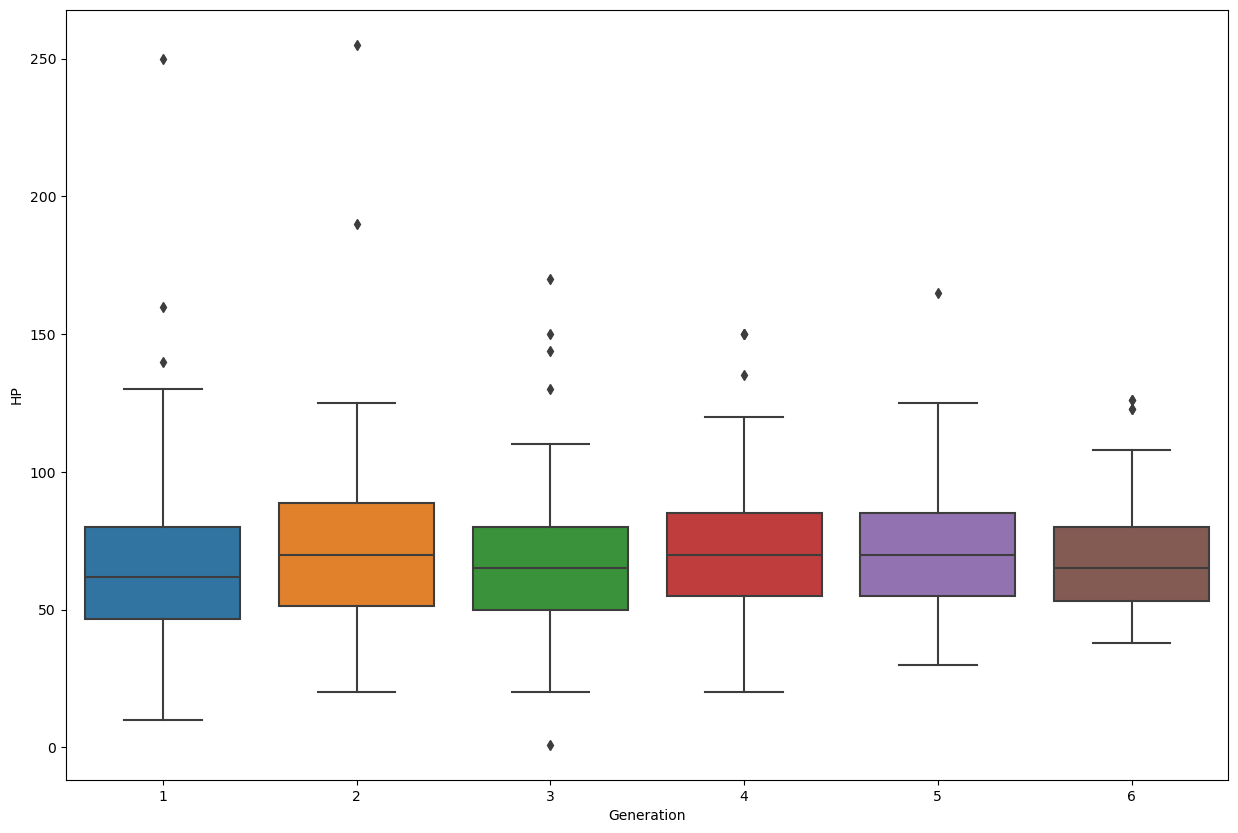

In [262]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Generation', y='HP', data=df)

On consulting your researchers, you’ve been instructed to remove them. Let’s start off by finding out what the 97% quantile of HP is and assign it to the variable quantile_97.

In [264]:
quantile_97 = df['HP'].quantile(0.97)
quantile_97

120.08999999999992

In [267]:
hp_outliers_df = df[df['HP'] > quantile_97]
hp_outliers_df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False
134,Vaporeon,Water,NaN,525,130,65,60,110,95,65,1,False
143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
171,Lanturn,Water,Electric,460,125,58,58,76,76,67,2,False
202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False


In [271]:
hp_outliers_ind = hp_outliers_df.index.tolist()

In [272]:
df1 = df.drop(index=hp_outliers_ind)
df1.shape

(776, 12)

<Axes: xlabel='Generation', ylabel='HP'>

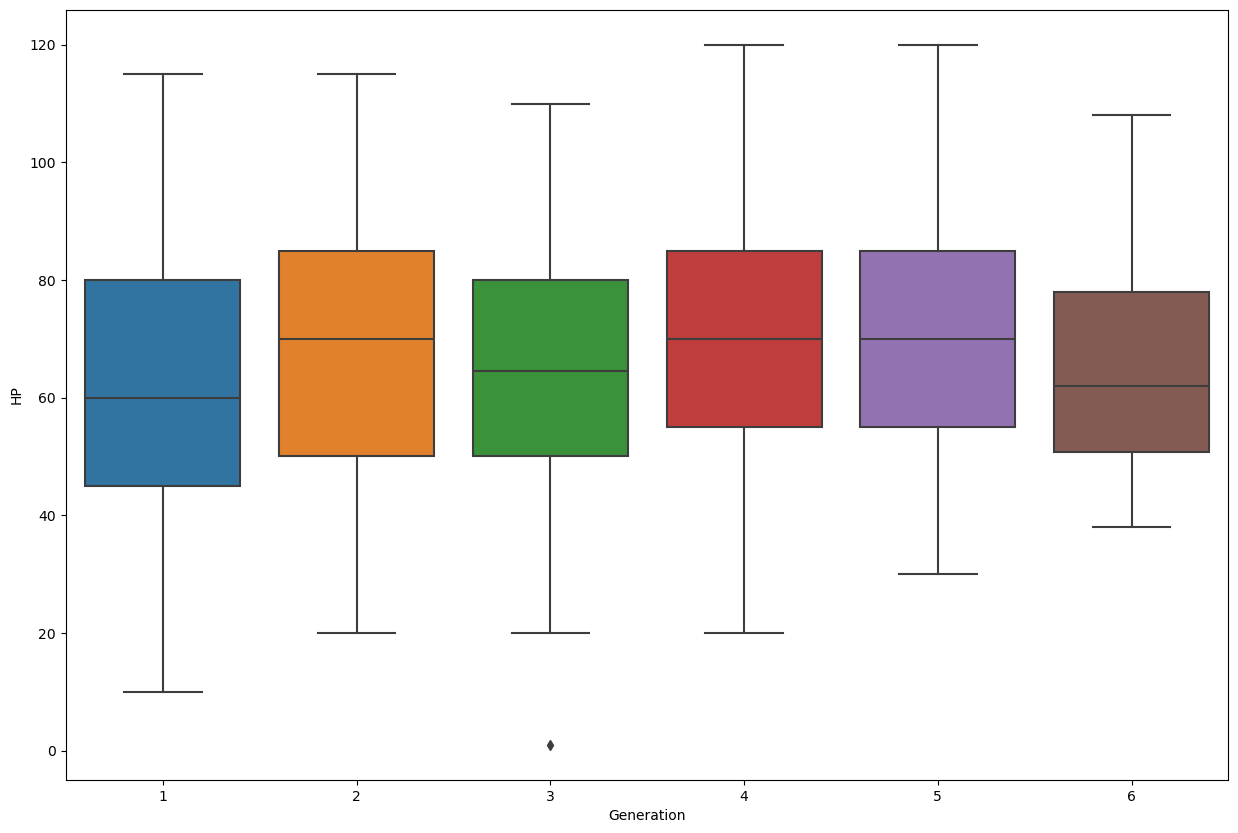

In [273]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Generation', y='HP', data=df1)

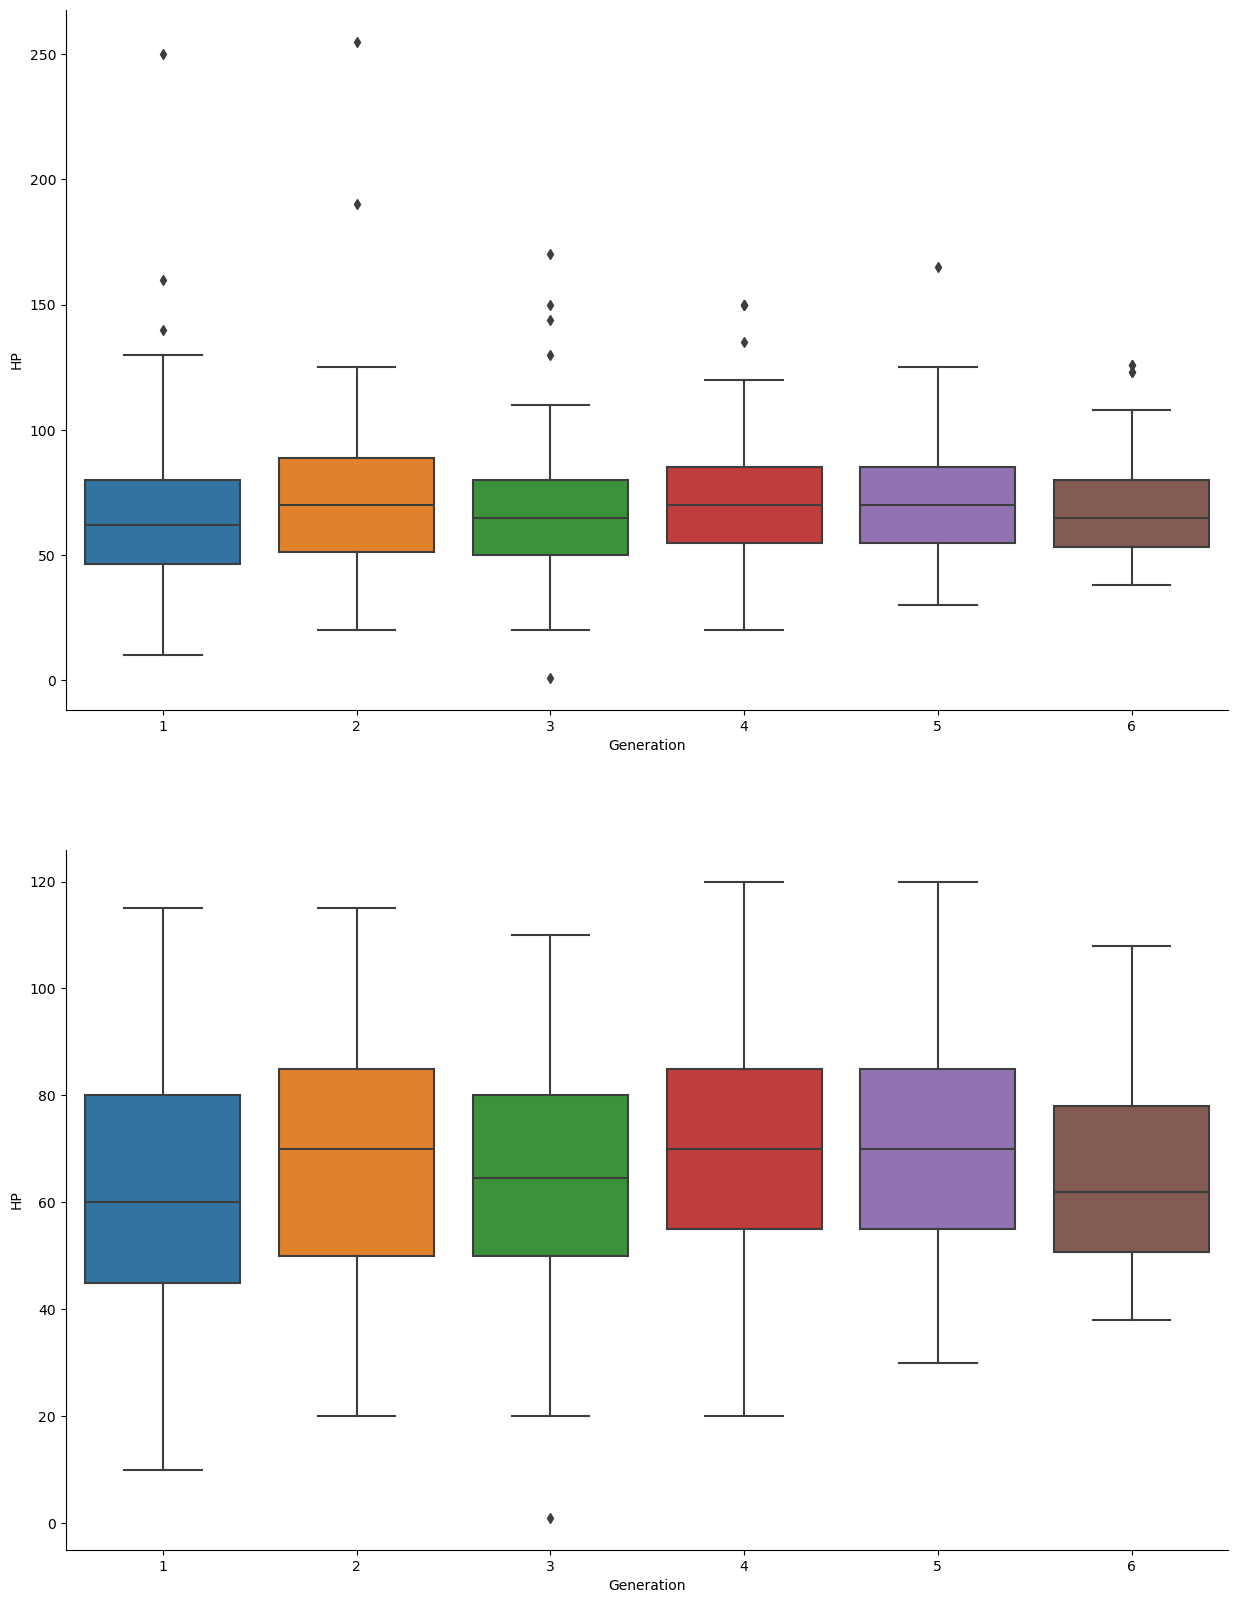

In [291]:
fig,axes=plt.subplots(2,1,figsize=(15,20))

sns.boxplot(x='Generation', y='HP', data=df,ax=axes[0])
sns.boxplot(x='Generation', y='HP', data=df1, ax=axes[1])
sns.despine()